* 导入Pandas和Numpy模块

In [2]:
import pandas as pd
import numpy as np

* 理解Pandas的数据结构Series

In [3]:
win_col = pd.Series ([21,21,19,16,14,13,
                      14,13])
print (win_col)

0    21
1    21
2    19
3    16
4    14
5    13
6    14
7    13
dtype: int64


In [4]:
team_col = pd.Series (['Houston Rockets',
                       'Golden State Warriors', 
                       'San Antonio Spurs',
                       'Minnesota Timberwolves',
                       'Denver Nuggets',
                       'Portland Trail Blazers',
                       'New Orleans Pelicans',
                       'Utah Jazz'])
loss_col = pd.Series ([4,6,8,11,12,12,13,14])

In [5]:
nba_df = pd.DataFrame ({'Team': team_col, 
                       'Win': win_col,
                       'Loss': loss_col})
print (nba_df)

                     Team  Win  Loss
0         Houston Rockets   21     4
1   Golden State Warriors   21     6
2       San Antonio Spurs   19     8
3  Minnesota Timberwolves   16    11
4          Denver Nuggets   14    12
5  Portland Trail Blazers   13    12
6    New Orleans Pelicans   14    13
7               Utah Jazz   13    14


In [13]:
nba_df.head() # 前五行

,Team,Win,Loss
0,Houston Rockets,20,4
1,Golden State Warriors,21,6
2,San Antonio Spurs,19,8
3,Minnesota Timberwolves,16,11
4,Denver Nuggets,14,12


In [14]:
nba_df.tail() # 后五行

,Team,Win,Loss
3,Minnesota Timberwolves,16,11
4,Denver Nuggets,14,12
5,Portland Trail Blazers,13,12
6,New Orleans Pelicans,14,13
7,Utah Jazz,13,14


In [15]:
nba_df.describe() # 描述信息
print (nba_df.index) # 行标签
print (nba_df.columns) # 列标签
print (nba_df.dtypes) # 各列的数据类型
print (nba_df.values) # 具体的值

RangeIndex(start=0, stop=8, step=1)
Index(['Team', 'Win', 'Loss'], dtype='object')
Team    object
Win      int64
Loss     int64
dtype: object
[['Houston Rockets' 20 4]
 ['Golden State Warriors' 21 6]
 ['San Antonio Spurs' 19 8]
 ['Minnesota Timberwolves' 16 11]
 ['Denver Nuggets' 14 12]
 ['Portland Trail Blazers' 13 12]
 ['New Orleans Pelicans' 14 13]
 ['Utah Jazz' 13 14]]


In [19]:
df1 = nba_df.sort_index (axis=0, ascending=False)
df1.head()

,Team,Win,Loss
7,Utah Jazz,13,14
6,New Orleans Pelicans,14,13
5,Portland Trail Blazers,13,12
4,Denver Nuggets,14,12
3,Minnesota Timberwolves,16,11


In [20]:
df2 = nba_df.sort_index (axis=1, ascending=False)
df2.head()

,Win,Team,Loss
0,20,Houston Rockets,4
1,21,Golden State Warriors,6
2,19,San Antonio Spurs,8
3,16,Minnesota Timberwolves,11
4,14,Denver Nuggets,12


In [6]:
nba_df = nba_df.sort_values(by='Win', ascending=False)
nba_df.head()

,Team,Win,Loss
0,Houston Rockets,21,4
1,Golden State Warriors,21,6
2,San Antonio Spurs,19,8
3,Minnesota Timberwolves,16,11
4,Denver Nuggets,14,12


In [7]:
print (nba_df.Team)

0           Houston Rockets
1     Golden State Warriors
2         San Antonio Spurs
3    Minnesota Timberwolves
4            Denver Nuggets
6      New Orleans Pelicans
5    Portland Trail Blazers
7                 Utah Jazz
Name: Team, dtype: object


In [10]:
print (nba_df[1:5])

                     Team  Win  Loss
1   Golden State Warriors   21     6
2       San Antonio Spurs   19     8
3  Minnesota Timberwolves   16    11
4          Denver Nuggets   14    12


In [29]:
print (nba_df.iloc[1:5,0:2])
print (nba_df.iloc[1,1])

                     Team  Win
7               Utah Jazz   13
4          Denver Nuggets   14
6    New Orleans Pelicans   14
3  Minnesota Timberwolves   16
13


In [11]:
print ("提取Win大于16的数据")
print (nba_df[nba_df.Win>18])
print ("提取某些球队的数据")
print (nba_df[nba_df.Team.isin(['Utah Jazz','Denver Nuggets'])])

提取Win大于16的数据
                    Team  Win  Loss
0        Houston Rockets   21     4
1  Golden State Warriors   21     6
2      San Antonio Spurs   19     8
提取某些球队的数据
             Team  Win  Loss
4  Denver Nuggets   14    12
7       Utah Jazz   13    14


In [33]:
print (nba_df.mean())

Win     16.25
Loss    10.00
dtype: float64


In [12]:
nba_df["Win%"]=nba_df['Win']/(nba_df['Win']+nba_df['Loss'])
nba_df.sort_values(by='Win%', ascending=False)
nba_df.head()

,Team,Win,Loss,Win%
0,Houston Rockets,21,4,0.840000
1,Golden State Warriors,21,6,0.777778
2,San Antonio Spurs,19,8,0.703704
3,Minnesota Timberwolves,16,11,0.592593
4,Denver Nuggets,14,12,0.538462
5,Portland Trail Blazers,13,12,0.520000
6,New Orleans Pelicans,14,13,0.518519
7,Utah Jazz,13,14,0.481481


13    2
14    2
21    2
19    1
16    1
Name: Win, dtype: int64


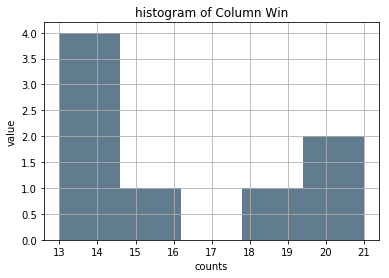

In [18]:
print (nba_df['Win'].value_counts())
import matplotlib.pyplot as plt
nba_df['Win'].plot.hist(grid=True, bins=5, color='#607c8e')
plt.title('histogram of Column Win')
plt.xlabel('counts')
plt.ylabel('value')
plt.show()

In [48]:
nba_df['Team'] = nba_df['Team'].str.lower()
nba_df.head()

,Team,Win,Loss,Win%
5,portland trail blazers,13,12,0.520000
7,utah jazz,13,14,0.481481
4,denver nuggets,14,12,0.538462
6,new orleans pelicans,14,13,0.518519
3,minnesota timberwolves,16,11,0.592593


In [19]:
nba_df['Win'].apply(lambda x: 1 if x>15 else 0)

0    1
1    1
2    1
3    1
4    0
6    0
5    0
7    0
Name: Win, dtype: int64

In [21]:
def make_label (win_p):
    if win_p > 0.5:
        return 'good'
    else:
        return 'bad'
nba_df['label'] = nba_df['Win%'].apply(make_label)
nba_df.head(10)

,Team,Win,Loss,Win%,label
0,Houston Rockets,21,4,0.840000,good
1,Golden State Warriors,21,6,0.777778,good
2,San Antonio Spurs,19,8,0.703704,good
3,Minnesota Timberwolves,16,11,0.592593,good
4,Denver Nuggets,14,12,0.538462,good
6,New Orleans Pelicans,14,13,0.518519,good
5,Portland Trail Blazers,13,12,0.520000,good
7,Utah Jazz,13,14,0.481481,bad


In [22]:
nba_df.to_csv('datasets/nba_out.csv')
nba_df2 = pd.read_csv('datasets/nba.csv')
nba_df2.head()

,Team,Win,Loss,Win%
0,Houston Rockets,20,4,0.83
1,Golden State Warriors,21,6,0.78
2,San Antonio Spurs,19,8,0.70
3,Minnesota Timberwolves,16,11,0.59
4,Denver Nuggets,14,12,0.54
